<img src="https://www.arrhythmia.com.sg/wp-content/uploads/2016/07/heartattack-img.png" />

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('../input/cardio-data-set/cardio_train.csv')

In [4]:
df.head(5)

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [5]:
## Separate the columns

df=pd.read_csv('../input/cardio-data-set/cardio_train.csv',sep=';')

In [6]:
df.head(786)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,1086,23301,1,141,60.0,120,80,1,1,0,0,1,1
782,1087,14473,1,173,73.0,160,100,1,1,0,0,0,1
783,1092,21292,1,160,90.0,147,84,2,1,0,1,1,1
784,1093,18112,2,169,74.0,120,80,1,1,0,0,0,0


In [7]:
#Data set Shape

df.shape

(70000, 13)

In [8]:
#Data Set info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [9]:
#Check Null value

df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
## To see correaltion

df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [11]:
##Drop Id ..its not usefull

df=df.drop('id',axis=1)

In [12]:
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [13]:
## How many people have cardio vascular Disease

df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

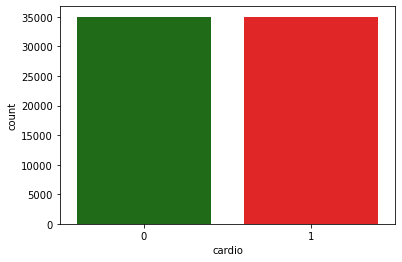

In [14]:
## Now visualize data who have cardio diseases and who have safe 

sns.countplot(df['cardio'],palette=['#137909','#ff0707']);


In [15]:
## we see that its closely 50/50

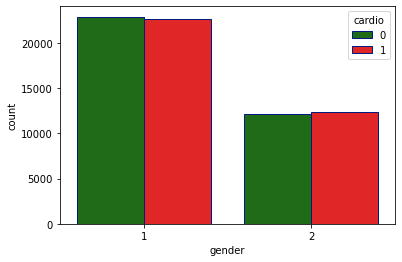

In [16]:
## Cardio Vascular diseases according to gender

sns.countplot(x='gender',hue='cardio',data=df,palette=['#137909','#ff0707'],edgecolor=sns.color_palette('dark',n_colors=1))

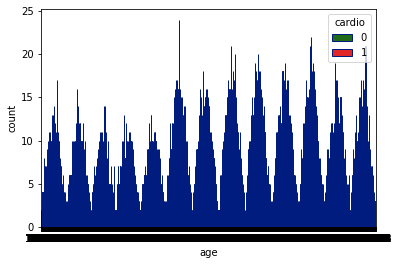

In [17]:
sns.countplot(x='age',hue='cardio',data=df,palette=['#137909','#ff0707'],edgecolor=sns.color_palette('dark',n_colors=1))

In [18]:
### The data is so noise here bcz age is given in days
##Now age convert in year

df['age']=(df['age']/365).round(0)



In [19]:
df.age

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: age, Length: 70000, dtype: float64

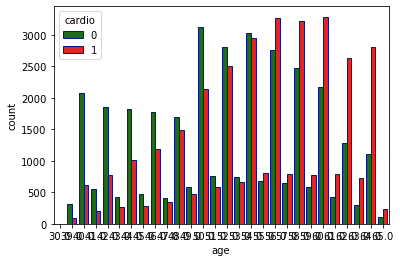

In [20]:
## Ok fine now cardio vascular detect according to age (don't worry it is converted in years now)

sns.countplot(x='age',hue='cardio',data=df,palette=['#137909','#ff0707'],edgecolor=sns.color_palette('dark',n_colors=1))

In [21]:
## We See diseases increased when age is increased 

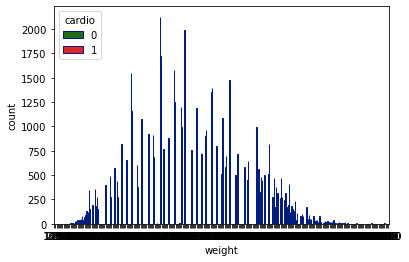

In [22]:
## Now According to weight

sns.countplot(x='weight',hue='cardio',data=df,palette=['#137909','#ff0707'],edgecolor=sns.color_palette('dark',n_colors=1))

In [23]:
##Splited Features and Label

x=df.drop(['cardio'],axis=1)

In [24]:
x.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.0,2,168,62.0,110,80,1,1,0,0,1
1,55.0,1,156,85.0,140,90,3,1,0,0,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0
3,48.0,2,169,82.0,150,100,1,1,0,0,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0


In [25]:
y=df['cardio']

In [26]:
#Take data for test size
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20)

In [27]:
##Use Random Forest bcz data set is big but we also see others classification algo

from sklearn.ensemble import RandomForestClassifier


In [28]:
rf=RandomForestClassifier()

In [29]:
rf

RandomForestClassifier()

In [30]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [31]:
rf.score(xtest,ytest)

0.7055714285714285

In [32]:
##Predict the value to check 

rf.predict(xtest)

array([1, 0, 0, ..., 0, 1, 1])

In [33]:
ytest

6401     0
37365    0
11178    0
44097    1
14558    1
        ..
24712    1
67729    0
24476    1
69958    1
44409    1
Name: cardio, Length: 14000, dtype: int64

In [34]:
##Now we check using Decission Tree

from sklearn.tree import  DecisionTreeClassifier


In [35]:
dt=DecisionTreeClassifier()

In [36]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [37]:
dt.score(xtest,ytest)

0.6294285714285714

In [38]:
#Now using SVm

from sklearn.svm import SVC


In [39]:
sv=SVC()

In [40]:
sv.fit(xtrain,ytrain)

SVC()

In [41]:
sv.score(xtest,ytest)

0.7182857142857143

In [42]:
sv.predict(xtest)

array([1, 0, 0, ..., 0, 1, 1])

In [43]:
ytest

6401     0
37365    0
11178    0
44097    1
14558    1
        ..
24712    1
67729    0
24476    1
69958    1
44409    1
Name: cardio, Length: 14000, dtype: int64

In [44]:
##Logistic Regression

from sklearn.linear_model import LogisticRegression


In [45]:
lg= LogisticRegression()

In [46]:
lg.fit(xtrain,ytrain)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [47]:
lg.score(xtest,ytest)

0.6997857142857142

In [48]:
lg.predict_proba(xtest)

array([[0.36166673, 0.63833327],
       [0.7495117 , 0.2504883 ],
       [0.69072086, 0.30927914],
       ...,
       [0.47880977, 0.52119023],
       [0.43377118, 0.56622882],
       [0.09798923, 0.90201077]])

In [49]:
lg.predict(xtest)

array([1, 0, 0, ..., 1, 1, 1])

In [50]:
##Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [51]:
nb=GaussianNB()

In [52]:
nb.fit(xtrain,ytrain)

GaussianNB()

In [53]:
nb.score(xtest,ytest)

0.589

<h4> Here we will Choose SVM bcz we get Higher accuracy in this model -> 71% </h4>
<h5>But Svm is not so good for large data set ,random forest is good for large data set, but we get accuracy 
70% here</h5>